In [170]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set some Pandas options
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

from datetime import datetime

In [171]:
segments = pd.read_csv("covid19_superdata.csv")

In [172]:
#get just the dates in wisconsin
wisconsin = segments[segments.StateFIPS==55].iloc[1:,4:-1]

#get population of state
#wi_pop = 0

wisconsin.head()

,2020-01-22_x,2020-01-23_x,2020-01-24_x,2020-01-25_x,2020-01-26_x,2020-01-27_x,2020-01-28_x,2020-01-29_x,2020-01-30_x,2020-01-31_x,...,2023-01-27_y,2023-01-28_y,2023-01-29_y,2023-01-30_y,2023-01-31_y,2023-02-01_y,2023-02-02_y,2023-02-03_y,2023-02-04_y,2023-02-05_y
3093,0,0,0,0,0,0,0,0,0,0,...,70,70,70,70,70,70,70,70,70,70
3094,0,0,0,0,0,0,0,0,0,0,...,42,42,42,42,42,42,42,42,42,42
3095,0,0,0,0,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
3096,0,0,0,0,0,0,0,0,0,0,...,46,46,46,46,46,46,46,46,46,46
3097,0,0,0,0,0,0,0,0,0,0,...,620,620,620,620,620,620,620,620,620,620


## Weekly Case Info:

In [185]:
#remove suffixes and convert to datetime
wi_cases = wisconsin.filter(regex='_x')
wi_cases.columns = wi_cases.columns.str.rstrip('_x')
wi_cases.columns = pd.to_datetime(wi_cases.columns)
#wi_cases = wi_cases.loc[:, '2022-06-01':'2022-12-31']
wi_cases_week = wi_cases.T.reset_index()
wi_cases_week = wi_cases_week.assign(Weeks = wi_cases_week['index']).drop(columns = 'index')
wi_cases_week['Weeks'] = wi_cases_week['Weeks'].astype('datetime64[ns]')

#get mean cases per week
wi_cases_week_mean = wi_cases_week.resample('W-Mon', label='left', closed = 'left', on='Weeks').mean(numeric_only=True)
wi_cases_week_mean = wi_cases_week_mean.loc['2022-06-01':'2022-12-31', :]
wi_cases_new_week_mean = wi_cases_week_mean.sum(axis=1).diff()

<Axes: xlabel='Weeks'>

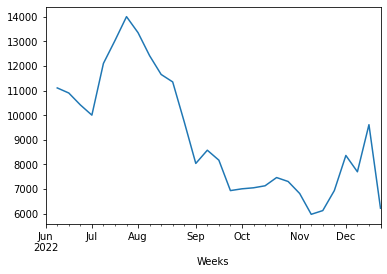

In [186]:
wi_cases_new_week_mean.plot()

## Weekly Death Info:

In [187]:
#remove suffixes and convert to datetime
wi_deaths = wisconsin.filter(regex='_y')
wi_deaths.columns = wi_deaths.columns.str.rstrip('_y')
wi_deaths.columns = pd.to_datetime(wi_deaths.columns)
#wi_deaths = wi_deaths.loc[:, '2022-06-01':'2022-12-31']
wi_deaths_week = wi_deaths.T.reset_index()
wi_deaths_week = wi_deaths_week.assign(Weeks = wi_deaths_week['index']).drop(columns = 'index')
wi_deaths_week['Weeks'] = wi_deaths_week['Weeks'].astype('datetime64[ns]')

#get mean deaths per week
wi_deaths_week_mean = wi_deaths_week.resample('W-Mon', label='left', closed = 'left', on='Weeks').mean()
wi_deaths_week_mean = wi_deaths_week_mean.loc['2022-06-01':'2022-12-31', :]
wi_deaths_new_week_mean = wi_deaths_week_mean.sum(axis=1).diff()

<Axes: xlabel='Weeks'>

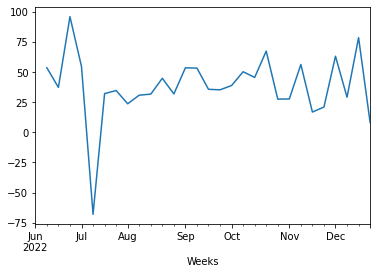

In [188]:
wi_deaths_new_week_mean.plot()

## Case Data Compared to Three More States:

In [181]:
#get just the dates in utah (UT)
utah = segments[segments.StateFIPS==49].iloc[1:,4:-1]

#remove suffixes and convert to datetime
ut_cases = utah.filter(regex='_x')
ut_cases.columns = ut_cases.columns.str.rstrip('_x')
ut_cases.columns = pd.to_datetime(ut_cases.columns)
ut_cases_week = ut_cases.T.reset_index()
ut_cases_week = ut_cases_week.assign(Weeks = ut_cases_week['index']).drop(columns = 'index')
ut_cases_week['Weeks'] = ut_cases_week['Weeks'].astype('datetime64[ns]')

#get mean cases per week
ut_cases_week_mean = ut_cases_week.resample('W-Mon', label='left', closed = 'left', on='Weeks').mean(numeric_only=True)
ut_cases_week_mean = ut_cases_week_mean.loc['2022-06-01':'2022-12-31', :]
ut_cases_new_week_mean = ut_cases_week_mean.sum(axis=1).diff()


#get just the dates in nebraska (NE)
nebraska = segments[segments.StateFIPS==31].iloc[1:,4:-1]

#remove suffixes and convert to datetime
ne_cases = nebraska.filter(regex='_x')
ne_cases.columns = ne_cases.columns.str.rstrip('_x')
ne_cases.columns = pd.to_datetime(ne_cases.columns)
ne_cases_week = ne_cases.T.reset_index()
ne_cases_week = ne_cases_week.assign(Weeks = ne_cases_week['index']).drop(columns = 'index')
ne_cases_week['Weeks'] = ne_cases_week['Weeks'].astype('datetime64[ns]')

#get mean cases per week
ne_cases_week_mean = ne_cases_week.resample('W-Mon', label='left', closed = 'left', on='Weeks').mean(numeric_only=True)
ne_cases_week_mean = ne_cases_week_mean.loc['2022-06-01':'2022-12-31', :]
ne_cases_new_week_mean = ne_cases_week_mean.sum(axis=1).diff()


#get just the dates in alaska (AK)
alaska = segments[segments.StateFIPS==2].iloc[1:,4:-1]

#remove suffixes and convert to datetime
ak_cases = alaska.filter(regex='_x')
ak_cases.columns = ak_cases.columns.str.rstrip('_x')
ak_cases.columns = pd.to_datetime(ak_cases.columns)
ak_cases_week = ak_cases.T.reset_index()
ak_cases_week = ak_cases_week.assign(Weeks = ak_cases_week['index']).drop(columns = 'index')
ak_cases_week['Weeks'] = ak_cases_week['Weeks'].astype('datetime64[ns]')

#get mean cases per week
ak_cases_week_mean = ak_cases_week.resample('W-Mon', label='left', closed = 'left', on='Weeks').mean(numeric_only=True)
ak_cases_week_mean = ak_cases_week_mean.loc['2022-06-01':'2022-12-31', :]
ak_cases_new_week_mean = ak_cases_week_mean.sum(axis=1).diff()

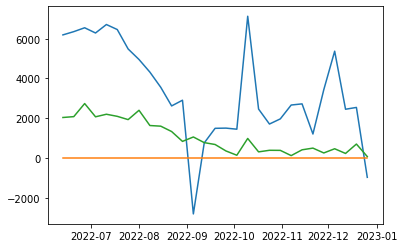

In [182]:
#mean data across the three states
fig1 = plt.figure()
ax1 = fig1.add_subplot()

ax1.plot(ut_cases_new_week_mean)
ax1.plot(ne_cases_new_week_mean)
ax1.plot(ak_cases_new_week_mean)

## Deaths Data Compared to Three More States:

In [183]:
#utah
#remove suffixes and convert to datetime
ut_deaths = utah.filter(regex='_x')
ut_deaths.columns = ut_deaths.columns.str.rstrip('_x')
ut_deaths.columns = pd.to_datetime(ut_deaths.columns)
ut_deaths_week = ut_deaths.T.reset_index()
ut_deaths_week = ut_deaths_week.assign(Weeks = ut_deaths_week['index']).drop(columns = 'index')
ut_deaths_week['Weeks'] = ut_deaths_week['Weeks'].astype('datetime64[ns]')

#get mean deaths per week
ut_deaths_week_mean = ut_deaths_week.resample('W-Mon', label='left', closed = 'left', on='Weeks').mean(numeric_only=True)
ut_deaths_week_mean = ut_deaths_week_mean.loc['2022-06-01':'2022-12-31', :]
ut_deaths_new_week_mean = ut_deaths_week_mean.sum(axis=1).diff()


#nebraska
#remove suffixes and convert to datetime
ne_deaths = nebraska.filter(regex='_x')
ne_deaths.columns = ne_deaths.columns.str.rstrip('_x')
ne_deaths.columns = pd.to_datetime(ne_deaths.columns)
ne_deaths_week = ne_deaths.T.reset_index()
ne_deaths_week = ne_deaths_week.assign(Weeks = ne_deaths_week['index']).drop(columns = 'index')
ne_deaths_week['Weeks'] = ne_deaths_week['Weeks'].astype('datetime64[ns]')

#get mean deaths per week
ne_deaths_week_mean = ne_deaths_week.resample('W-Mon', label='left', closed = 'left', on='Weeks').mean(numeric_only=True)
ne_deaths_week_mean = ne_deaths_week_mean.loc['2022-06-01':'2022-12-31', :]
ne_deaths_new_week_mean = ne_deaths_week_mean.sum(axis=1).diff()


#alaska
#remove suffixes and convert to datetime
ak_deaths = alaska.filter(regex='_x')
ak_deaths.columns = ak_deaths.columns.str.rstrip('_x')
ak_deaths.columns = pd.to_datetime(ak_deaths.columns)
ak_deaths_week = ak_deaths.T.reset_index()
ak_deaths_week = ak_deaths_week.assign(Weeks = ak_deaths_week['index']).drop(columns = 'index')
ak_deaths_week['Weeks'] = ak_deaths_week['Weeks'].astype('datetime64[ns]')

#get mean deaths per week
ak_deaths_week_mean = ak_deaths_week.resample('W-Mon', label='left', closed = 'left', on='Weeks').mean(numeric_only=True)
ak_deaths_week_mean = ak_deaths_week_mean.loc['2022-06-01':'2022-12-31', :]
ak_deaths_new_week_mean = ak_deaths_week_mean.sum(axis=1).diff()

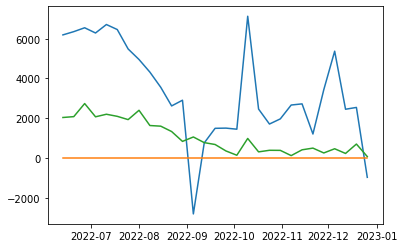

In [184]:
#mean data across the three states
fig1 = plt.figure()
ax1 = fig1.add_subplot()

ax1.plot(ut_deaths_new_week_mean)
ax1.plot(ne_deaths_new_week_mean)
ax1.plot(ak_deaths_new_week_mean)